# MK test for satellite data

In [3]:
#import general packages
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# set plotting to unique style
sb.set_theme(style="ticks")
sb.set_context("paper")

#import analysis packages
import ipympl
from scipy.signal import periodogram 

# import state space models package
import statsmodels.api as sm

#import custom functions
from custom_functions import data_split, UCM, Mann_Kendall
importlib.reload(UCM)
importlib.reload(data_split)
#importlib.reload(Mann_Kendall)

%matplotlib widget


In [4]:
# Template for each site
site_template = {
    "raw": None,
    "train_period":[],
    "train": None,
    "p_val":None,
    "z_val":None,
    "overall_slope":None,
    "seasonal_slope":{}
}


# List of sites
Soil_moisture_sites = ["Zhurucay", "Quinuas", "6120191830", "6120208780", 
                       "6120254390", "6120288400","6121039290","6121047290",
                       "6121051790","6121064220"]

# Create the main dictionary for Soil moisture
analysis_overview = {site: site_template.copy() for site in Soil_moisture_sites}


In [5]:
# Load the data into a dataframe and append to dict
SM_data = pd.read_csv("../../data/shapefiles/SM_selectedwatersheds_model.csv")
SM_data['date'] = pd.to_datetime(SM_data['date'],format='%Y-%m-%d',errors='coerce')
SM_data.set_index('date', inplace=True)



# Loop through each site in your site list
for site in Soil_moisture_sites:
    if site in SM_data.columns:
        analysis_overview[site]['raw'] = SM_data[site]
    else:
        print(f"Warning: {site} not found in SM_data columns.")

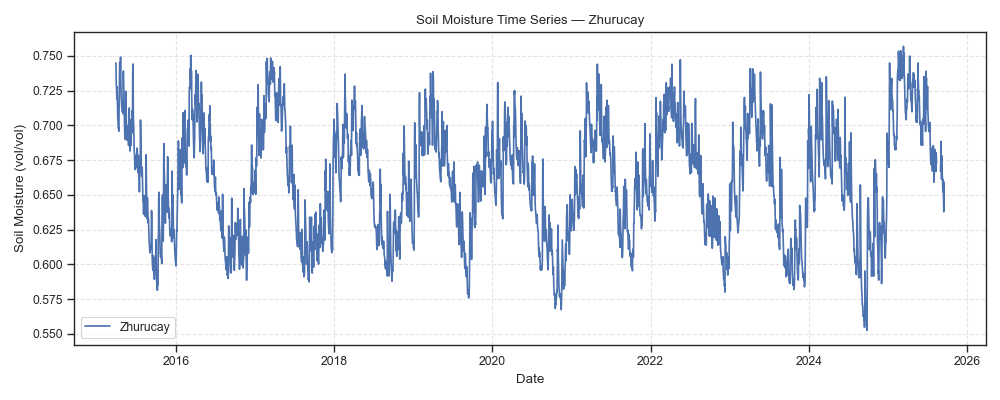

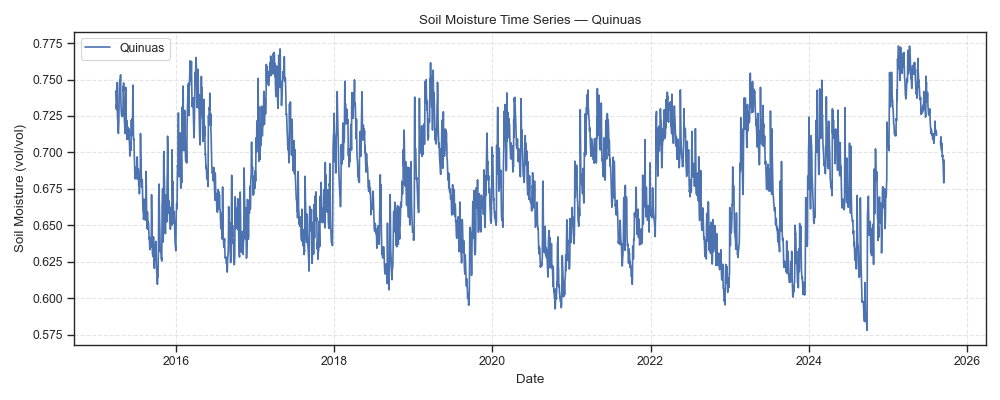

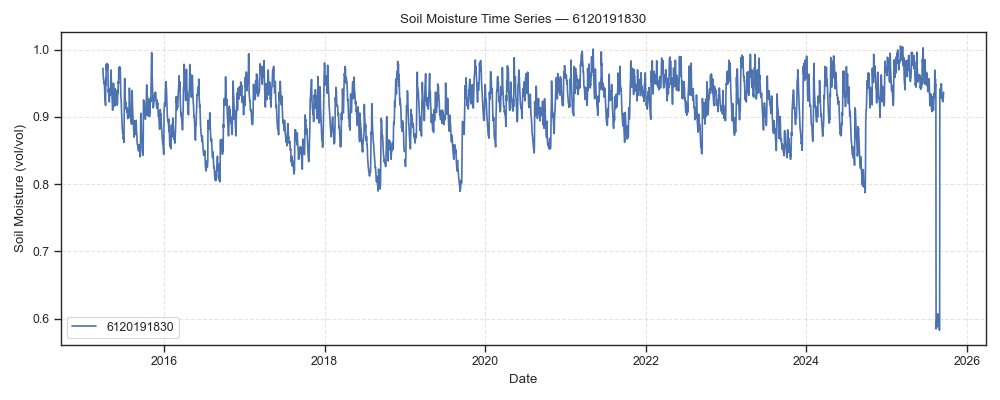

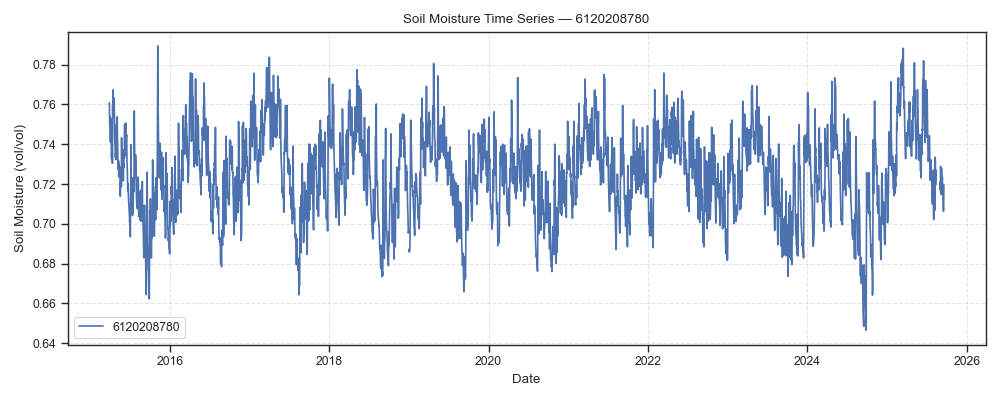

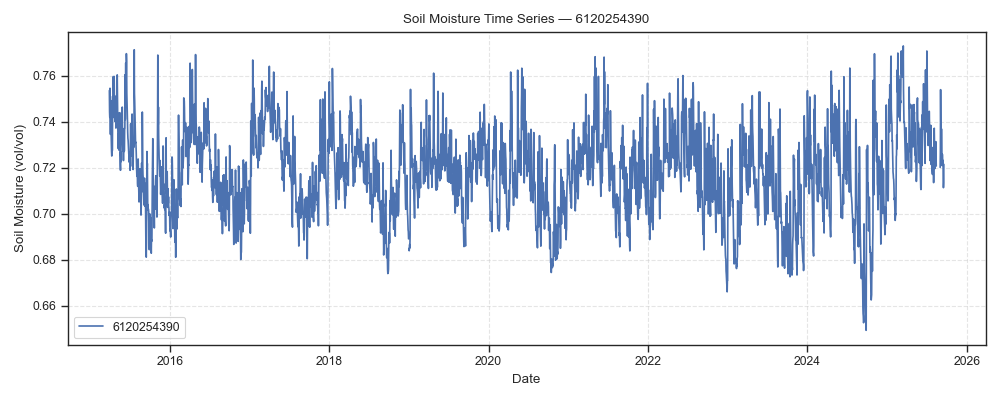

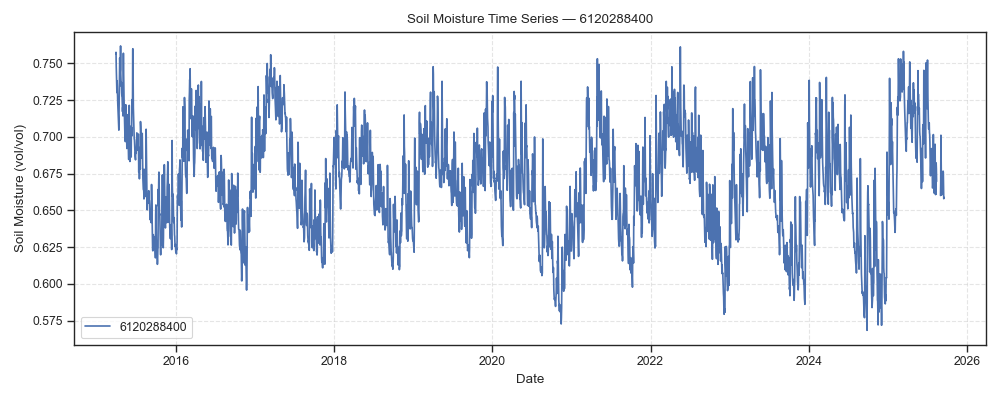

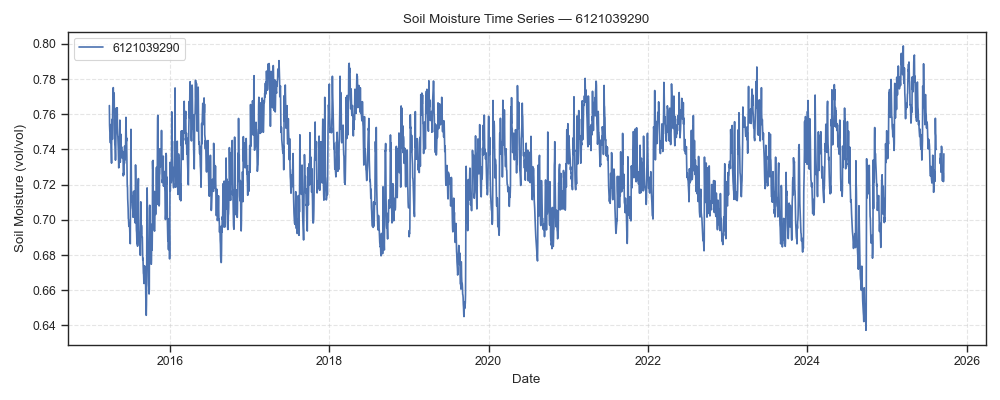

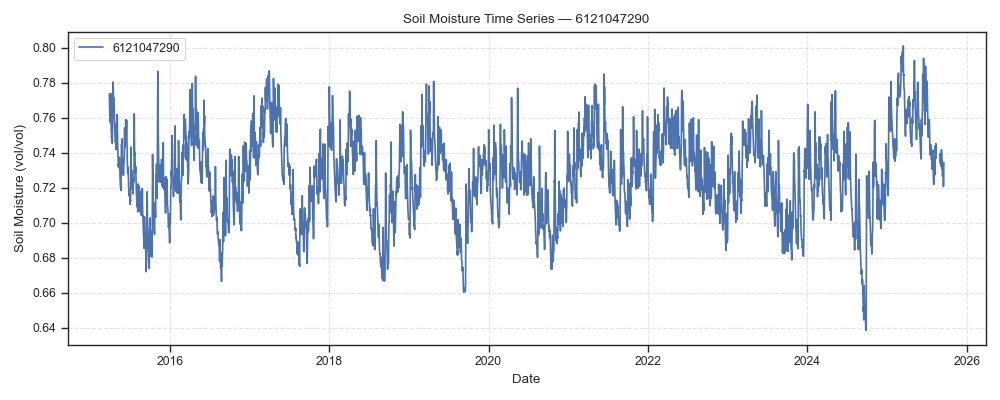

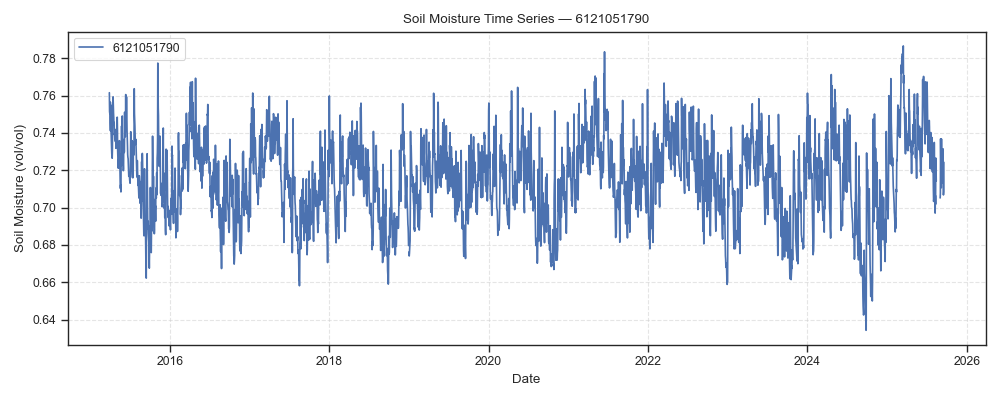

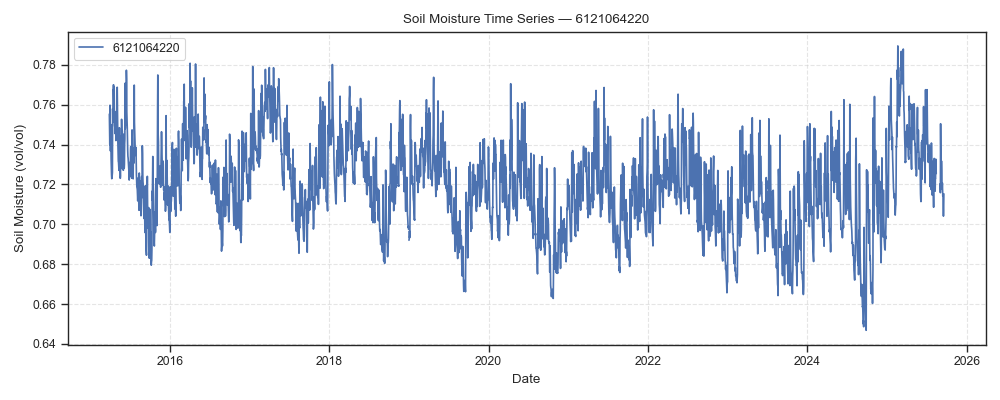

In [16]:
# Loop through all sites
for site in Soil_moisture_sites:
    data = analysis_overview[site]['raw']
    
    # Skip empty data
    if data is None or data.empty:
        print(f"Skipping {site} (no data)")
        continue
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(data.index, data.values, label=f"{site}", color="C0")
    plt.title(f"Soil Moisture Time Series — {site}")
    plt.xlabel("Date")
    plt.ylabel("Soil Moisture (vol/vol)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show();

## Use seasonal Mann kendall

- make sure start is jan 1 and end is dec 31

In [ ]:

for site in Soil_moisture_sites:
    data = analysis_overview[site]['raw']

    start_year = data.index.min().year
    end_year = data.index.max().year

    # Only keep full years
    trimmed = data.loc[f'{start_year+1}-01-01':f'{end_year-1}-12-31']

    # Update dataframe
    analysis_overview[site].update({"train_period":[f'{start_year+1}-01-01 : {end_year-1}-12-31'],
                                    "train": trimmed})


In [ ]:
# # Flatten nested dict into a tidy dataframe
# records = []

# for site, site_data in analysis_overview.items():
#     p_val = site_data.get('p_val', None)
#     z_val = site_data.get('z_val', None)
#     overall_slope = site_data.get('overall_slope', None)
#     seasonal_slopes = site_data.get('seasonal_slope', {})

#     for season, slope in seasonal_slopes.items():
#         records.append({
#             "site": site,
#             "p_val": float(p_val) if p_val is not None else None,
#             "z_val": float(z_val) if z_val is not None else None,
#             "overall_slope": float(overall_slope) if overall_slope is not None else None,
#             "season": season,
#             "seasonal_slope": float(slope)
#         })

# df_summary = pd.DataFrame(records)

# # Optional: sort nicely
# df_summary = df_summary.sort_values(["site", "season"]).reset_index(drop=True)

# display(df_summary)


,site,p_val,z_val,overall_slope,season,seasonal_slope
0,6120191830,0.000000,16.344660,0.003833,1,0.001848
1,6120191830,0.000000,16.344660,0.003833,2,0.004944
2,6120191830,0.000000,16.344660,0.003833,3,0.002950
3,6120191830,0.000000,16.344660,0.003833,4,0.001636
4,6120191830,0.000000,16.344660,0.003833,5,0.003725
...,...,...,...,...,...,...
115,Zhurucay,0.000676,-3.399269,-0.000568,8,0.002126
116,Zhurucay,0.000676,-3.399269,-0.000568,9,-0.000705
117,Zhurucay,0.000676,-3.399269,-0.000568,10,-0.001243
118,Zhurucay,0.000676,-3.399269,-0.000568,11,-0.001126


In [ ]:
# # Filter only for seasons 3, 6, 9, and 12
# selected_seasons = [3, 6, 9, 12]
# df_filtered = df_summary[df_summary["season"].isin(selected_seasons)]

# # Pivot so that each season becomes a column
# df_pivot = df_filtered.pivot_table(
#     index=["site", "p_val", "z_val", "overall_slope"],
#     columns="season",
#     values="seasonal_slope"
# ).reset_index()
# df_pivot["trend_direction"] = df_pivot["overall_slope"].apply(
#     lambda x: "Increasing" if x > 0 else "Decreasing"
# )

# df_pivot.columns.name = None

# # Define new order
# new_order = ['site', 'p_val', 'z_val', 'overall_slope', 'trend_direction', 3, 6, 9, 12]

# # Reorder
# df_pivot = df_pivot[new_order]

# # Optional: rename columns for readability
# df_pivot = df_pivot.rename(columns={
#     3: "slope_Mar",
#     6: "slope_Jun",
#     9: "slope_Sep",
#     12: "slope_Dec"
# })

# display(df_pivot)

# df_pivot.to_csv("../../../Python/output/TS_SM/SMK_results.csv")

,site,p_val,z_val,overall_slope,trend_direction,slope_Mar,slope_Jun,slope_Sep,slope_Dec
0,6120191830,0.000000e+00,16.344660,0.003833,Increasing,0.002950,0.004435,0.002432,0.001098
1,6120208780,4.440892e-15,-7.843442,-0.000940,Decreasing,-0.001510,-0.001502,-0.002456,-0.002824
2,6120254390,0.000000e+00,-9.548787,-0.001015,Decreasing,-0.002017,-0.001454,-0.001492,-0.001760
3,6120288400,0.000000e+00,-14.627515,-0.002526,Decreasing,-0.003871,-0.001709,-0.003655,-0.006151
4,6121039290,0.000000e+00,-12.359560,-0.001478,Decreasing,-0.002011,-0.001184,-0.002697,-0.003217
5,6121047290,2.772728e-04,-3.635657,-0.000442,Decreasing,-0.001607,-0.000984,-0.000460,-0.002258
6,6121051790,2.171691e-01,-1.234091,-0.000155,Decreasing,-0.000504,-0.000588,-0.001270,-0.001771
7,6121064220,0.000000e+00,-28.252760,-0.003516,Decreasing,-0.004700,-0.004162,-0.003454,-0.004919
8,Quinuas,0.000000e+00,-14.174533,-0.002222,Decreasing,-0.004220,-0.001693,-0.002429,-0.004121
9,Zhurucay,6.756621e-04,-3.399269,-0.000568,Decreasing,-0.002942,0.000415,-0.000705,-0.003927


Validation using the pmk package

In [34]:
import pandas as pd
import pymannkendall as pmk
from statsmodels.tsa.seasonal import STL

# Create an empty list to store results
results = []

for site in Soil_moisture_sites:
    # Extract daily data (Series)
    data = analysis_overview[site]['train']  # pandas Series
    
    # Step 0: Remove invalid indices (like 'date')
    valid_mask = pd.to_datetime(data.index, errors='coerce').notna()
    data = data[valid_mask]
    
    # Step 1: Ensure DatetimeIndex
    data.index = pd.to_datetime(data.index)

    # Step 2: Remove seasonal cycle: subtract each month's mean
    data_stl = data.dropna()
    stl = STL(data_stl, period=365)  # assuming daily data with yearly seasonality
    res = stl.fit()
    data_deseasoned = data - res.seasonal

    # Step 3: Aggregate daily -> monthly averages for seasonal MK
    monthly_data = data.resample('ME').mean()
    monthly_data_deseasoned = data_deseasoned.resample('ME').mean()
    monthly_values = monthly_data.values
    monthly_values_deseasoned = monthly_data_deseasoned.values

    period = 12  # months per year


    # Step 4: Run Seasonal Mann-Kendall with slope
    try:
        seasonal_result = pmk.seasonal_test(monthly_values, period=period)
        seasonal_trend = seasonal_result.trend
        seasonal_p = seasonal_result.p
        seasonal_tau = seasonal_result.Tau
        seasonal_slope = seasonal_result.slope  # This is the Sen's slope (vol/vol per month)
    except Exception:
        seasonal_trend = None
        seasonal_p = None
        seasonal_tau = None
        seasonal_slope = None

    # Step 5: Run Robust MK (Hamed-Rao) on raw daily data
    try:
        robust_result = pmk.hamed_rao_modification_test(monthly_data_deseasoned)
        robust_trend = robust_result.trend
        robust_p = robust_result.p
        robust_tau = robust_result.Tau
        robust_slope = robust_result.slope
    except Exception:
        robust_trend = None
        robust_p = None
        robust_tau = None
        robust_slope = None

    # Step 6: Append results to list
    results.append({
        'Site': site,
        'Seasonal_MK_Trend': seasonal_trend,
        'Seasonal_MK_p': seasonal_p,
        'Seasonal_MK_Tau': seasonal_tau,
        'Seasonal_MK_Slope': seasonal_slope,        # include Sen's slope
        'Robust_MK_Trend': robust_trend,
        'Robust_MK_p': robust_p,
        'Robust_MK_Tau': robust_tau,
        'Robust_MK_Slope': robust_slope
    })

# Step 7: Convert results list into DataFrame
results_df = pd.DataFrame(results)

# Step 8: Display the results and save df
display(results_df)
results_df.to_csv("../../../Python/output/TS_SM/SMK_results_validation.csv")


,Site,Seasonal_MK_Trend,Seasonal_MK_p,Seasonal_MK_Tau,Seasonal_MK_Slope,Robust_MK_Trend,Robust_MK_p,Robust_MK_Tau,Robust_MK_Slope
0,Zhurucay,no trend,7.864924e-01,-0.023148,-0.000118,no trend,6.092566e-01,-0.034268,-0.000023
1,Quinuas,decreasing,8.356523e-04,-0.259259,-0.001782,decreasing,1.302546e-03,-0.274143,-0.000180
2,6120191830,increasing,1.277131e-05,0.337963,0.003521,increasing,2.002573e-02,0.327795,0.000343
3,6120208780,no trend,7.578381e-02,-0.138889,-0.000685,decreasing,4.609715e-02,-0.179647,-0.000076
4,6120254390,no trend,5.794984e-02,-0.148148,-0.000745,decreasing,3.602589e-04,-0.177570,-0.000068
5,6120288400,decreasing,4.294588e-04,-0.273148,-0.002389,decreasing,2.942515e-04,-0.252336,-0.000179
6,6121039290,decreasing,1.576995e-03,-0.245370,-0.001434,decreasing,4.516694e-03,-0.291796,-0.000129
7,6121047290,no trend,4.888000e-01,-0.055556,-0.000340,no trend,5.214575e-01,-0.075805,-0.000035
8,6121051790,no trend,7.864924e-01,-0.023148,-0.000115,no trend,8.247461e-01,-0.024576,-0.000011
9,6121064220,decreasing,5.497824e-12,-0.532407,-0.003322,decreasing,1.822129e-10,-0.527172,-0.000272
